# Lec6: Numerical Integration of functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.integrate as spi
pi = np.pi

In [2]:
# Define function
def fofx(x):
    if x == 1:
        return 0.
    else:
        return np.cos(4. * np.pi * x) / np.sqrt(1. - x)

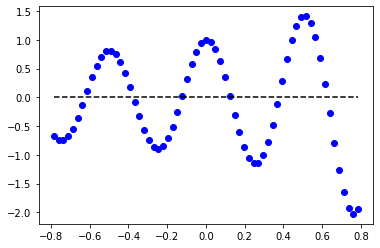

In [7]:
xmin = -pi / 4.
xmax = pi / 4.
Nx = 64
x = np.linspace(xmin, xmax, Nx + 1)
f = np.zeros(Nx + 1)

for n in range(Nx + 1):
    f[n] = fofx(x[n])


# Plot
plt.plot(x, f, 'bo')
# Plot zero horizontal line
xp = np.zeros(2)
yp = np.zeros(2)
xp[0] = x[0]
yp[0] = 0.
xp[1] = x[Nx]
yp[1] = 0.
plt.plot(xp,yp,'k--')
plt.show()

## Rectangular Approximation of Integral

In [10]:
# Exact value of this integral
Iexact = -.115881
# Calculate integral by rectangular approximation for Nx = 16

Nx = 256
xmin = -pi/4.
xmax = pi/4.
Dx = (xmax-xmin) / Nx
x = np.linspace(xmin, xmax, Nx + 1)

fint = np.zeros(Nx + 1) # Nx is the number of deltax so (Nx + 1) is the number of points

start = time.time()

for n in range(Nx):
    fint[n] = fofx(x[n])

end = time.time()

Tims = end - start

Ints = Dx * np.sum(fint) # Integral = sum of many (dx * fint)

Difs = Ints - Iexact # see how close our approx is to exact value

print('%8i' %Nx, '%12.6f' %Ints, '%12.6f' %Difs, '%20.4e' %Tims)

     256    -0.111939     0.003942           1.4460e-03


In [12]:
# Calculate integral by rectangular approximation for Nx = 4**i where i = 2, 3, .., 10
xmin = -pi/4.
xmax = pi/4.
# Define Nx and calcualte Dx & define x-array
Ms = 9 
for m in range(Ms): #
    Nx = 4 ** (m+2)
    Dx = (xmax - xmin) / Nx
    x = np.linspace(xmin, xmax, Nx + 1)

    fint = np.zeros(Nx + 1) # Nx is the number of deltax so (Nx + 1) is the number of points

    start = time.time()

    for n in range(Nx):
        fint[n] = fofx(x[n])

    end = time.time()

    Tims = end - start

    Ints = Dx * np.sum(fint) # Integral = sum of many (dx * fint)

    Difs = Ints - Iexact # see how close our approx is to exact value

    print('%8i' %Nx, '%12.6f' %Ints, '%12.6f' %Difs, '%20.4e' %Tims)

      16    -0.044227     0.071654           1.3208e-04
      64    -0.099688     0.016193           3.6621e-04
     256    -0.111939     0.003942           1.0812e-03
    1024    -0.114902     0.000979           3.1931e-03
    4096    -0.115636     0.000245           1.6699e-02
   16384    -0.115820     0.000061           5.1327e-02
   65536    -0.115865     0.000016           1.9505e-01
  262144    -0.115877     0.000004           7.5329e-01
 1048576    -0.115880     0.000001           2.9204e+00


## Trapezoidal Approximation of Integral

In [13]:
# Calculate integral by trapezoidal approximation for Nx = 4**i where i = 2, 3, .., 10
xmin = -pi/4.
xmax = pi/4.
# Define Nx and calcualte Dx & define x-array
Ms = 9 
for m in range(Ms): #
    Nx = 4 ** (m+2)
    Dx = (xmax - xmin) / Nx
    x = np.linspace(xmin, xmax, Nx + 1)

    fint = np.zeros(Nx + 1) # Nx is the number of deltax so (Nx + 1) is the number of points

    start = time.time()

    for n in range(Nx):
        fint[n] = fofx(x[n])

    end = time.time()

    Tims = end - start

    Ints = (Dx * np.sum(fint)) - (.5 * Dx * fint[0]) - (.5 * Dx * fint[Nx]) # Look at trapezoidal formula!!

    Difs = Ints - Iexact # see how close our approx is to exact value

    print('%8i' %Nx, '%12.6f' %Ints, '%12.6f' %Difs, '%20.4e' %Tims)

      16    -0.011065     0.104816           6.8903e-05
      64    -0.091397     0.024484           1.9026e-04
     256    -0.109867     0.006014           7.7987e-04
    1024    -0.114384     0.001497           3.6678e-03
    4096    -0.115507     0.000374           1.4549e-02
   16384    -0.115787     0.000094           5.6231e-02
   65536    -0.115857     0.000024           1.9619e-01
  262144    -0.115875     0.000006           7.5740e-01
 1048576    -0.115879     0.000002           2.8342e+00
